# Лабораторная работа

## Исследование углового распределения интенсивности космического излучения на уровне моря

В работе исследуется угловое распределение частиц космического излучения на уровне моря, которое состоит в основном из релятивистских $\mu$-мезонов, составляющих так называемую жесткую компоненту, и идущую в равновесии с этими $\mu$-мезонами мягкую компоненту. Мягкая компонента состоит из электронов и гамма-квантов, которые сравнительно легко поглощаются небольшими толщинами свинца, за что и получила такое название. Потоки частиц в данной работе предлагается измерять под различными углами $\theta$ к вертикали при помощи сцинтилляционного телескопа.

В данном эксперименте исследуется зависимость интенсивности частиц космического излучения на уровне моря от величины угла $\theta$ к вертикали. Полученную угловую зависимость можно аппроксимировать функцией вида $I(\theta) = I_0cos^n\theta$, где $I(\theta)$ - интенсивность космического излучения по направлению, составляющему угол $\theta$ с вертикалью, $I_0$ - значение $I(\theta)$ для угла $\theta = 0$, n - величина показателя степени. В данной работе предлагается экспериментально определить величину n.

## Экспериментальная установка

Схема экспериментальной установки изображена на рис.1
![Схема экспериментальной установки](ris1.png)

## Ход работы

1. Включаем высоковольтные источники питания ФЭУ, следим чтобы скорость счета составила около 30 отсчетов в секунду, определяем скорость счета двойных совпадений $I(\theta)$ для 10 положений телескопа с различными углами $\theta$ к вертикали, заносим данные в таблицы. При этом, измеряем и учитываем фоновые события $I_ф$

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

table = pd.read_csv('''C:\\Users\\Nikeyson-PC\\Desktop\\Laba 7-1.csv''', sep=';')

In [2]:
table

,angle,num
0,0,142
1,0,125
2,0,117
3,13,130
4,13,118
5,13,126
6,20,107
7,20,111
8,20,111
9,30,113


In [3]:
#Убираем фоновые значения из выборки (90 градусов), обработаем их позже.
arr = table.iloc[:-6, :]

In [4]:
x = np.array(arr.iloc[:, 0])
y = np.array(arr.iloc[:, 1])

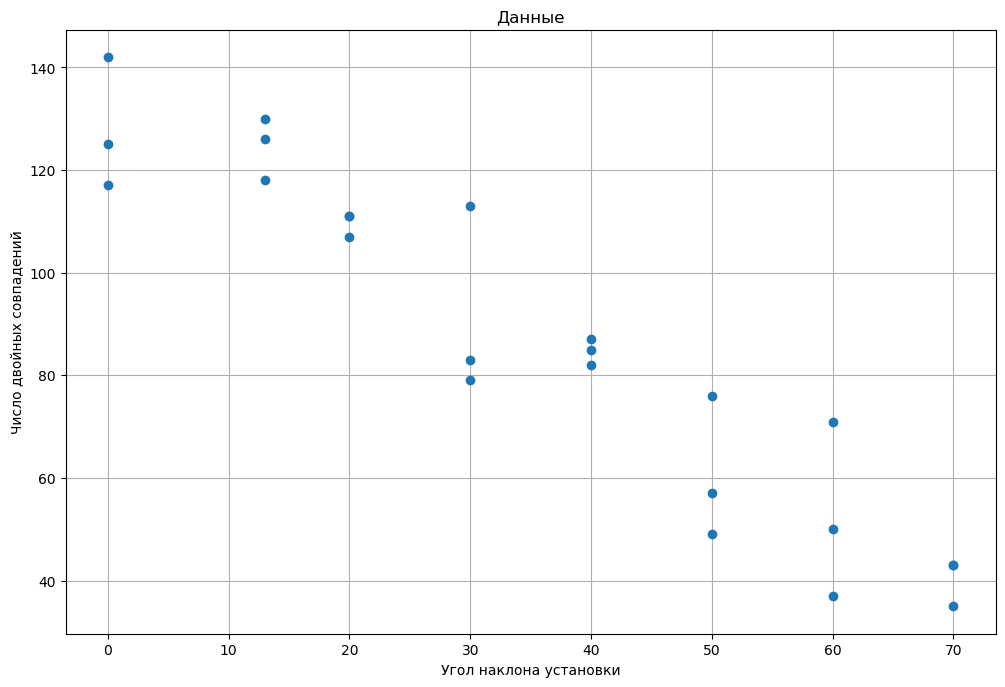

In [5]:
fig = plt.figure(figsize= (12, 8), dpi= 100)
ax1 = fig.add_subplot()
ax1.plot(x, y, 'o' ,label= "Всё")
ax1.grid(True)
plt.xlabel("Угол наклона установки")
plt.ylabel("Число двойных совпадений")
plt.title("Данные")
plt.show()

In [6]:
#Усредняем данные, вычитаем фоновые события
x1 = []
y1 = []
back_events = (table.iloc[-1, 1] + table.iloc[-2, 1] + table.iloc[-3, 1])/3
for i in range(0, len(x), 3):
    x1.append(x[i])
    y1.append((y[i]+y[i+1]+y[i+2])/3)
    y1[-1] = y1[-1] - back_events

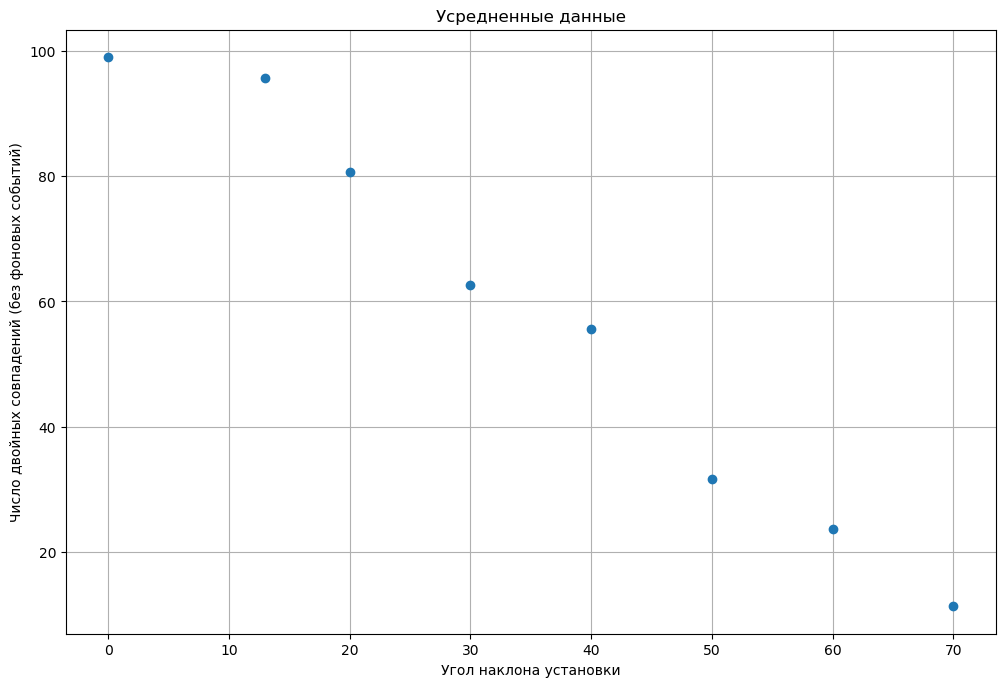

In [7]:
fig = plt.figure(figsize= (12, 8), dpi= 100)
ax1 = fig.add_subplot()
ax1.plot(x1, y1, 'o' ,label= "Всё")
ax1.grid(True)
plt.xlabel("Угол наклона установки")
plt.ylabel("Число двойных совпадений (без фоновых событий)")
plt.title("Усредненные данные")
plt.show()

2\. Оценим роль случайных совпадений при измерениях $I(\theta)$. $N_{сл} = 2\tau_{раз}N_1N_2$

In [8]:
n_rand = 2 * (10**(-7)) * 30 * 30
print(n_rand)

0.00018


Из этого, их роль незначительна

3\. Определяем показатель степени n по наклону прямой зависимости $lnI(\theta)$ от $lncos(\theta)$

In [9]:
x3 = [np.log(np.cos(i/180*np.pi)) for i in x1]
y3 = [np.log(i) for i in y1]
x3 = np.array(x3)
y3 = np.array(y3)
#Аппроксимируем прямой линией
a, b = np.polyfit(x3,y3,1)

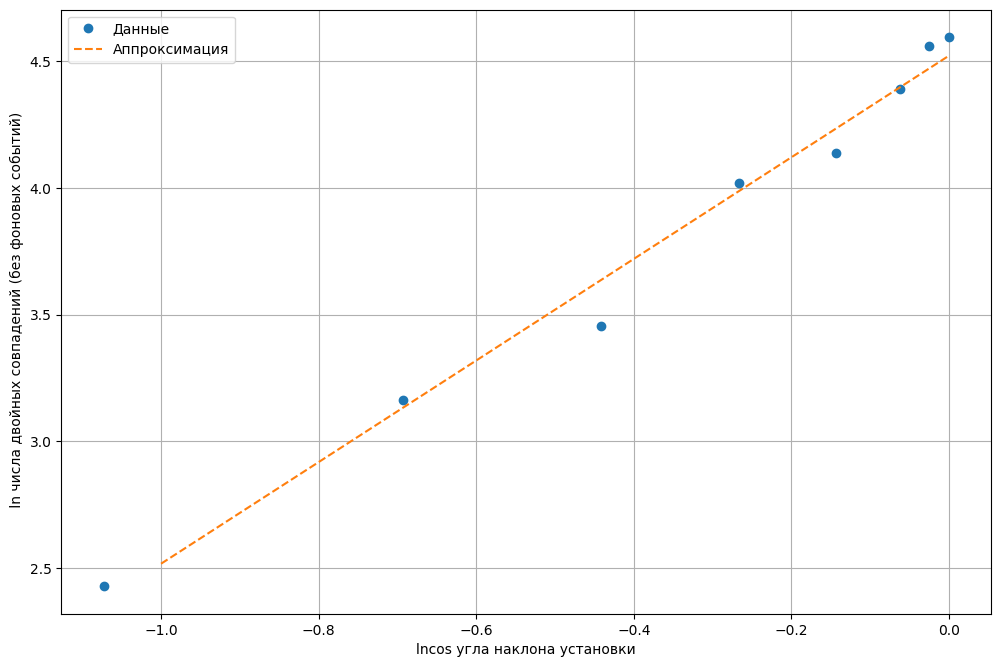

In [10]:
fig = plt.figure(figsize= (12, 8), dpi= 100)
ax1 = fig.add_subplot()
ax1.plot(x3, y3, 'o' ,label= "Данные")
ax1.grid(True)
ap = [i for i in range(-1, 1, 1)]
p = [a*i + b for i in ap]
ax1.plot(ap, p, "--", label= "Аппроксимация")
ax1.legend()
plt.xlabel("lncos угла наклона установки")
plt.ylabel(" ln числа двойных совпадений (без фоновых событий)")
plt.title("")
plt.show()

Коэффициент наклона прямой:

In [11]:
print(a)

2.005509062044409


Т.е. n $\approx$ 2

## Вывод

Исследовали зависимость интенсивности частиц космического излучения на уровне моря от величины угла $\theta$ к вертикали. Полученную угловую зависимость можно аппроксимировать функцией $I(\theta) = I_0cos^2\theta$.

Оценили роль случайных совпадений при измерениях $I(\theta)$, она незначительна и качественно не влияет на эксперимент.